# Optimización de Hyper-parámetros

Prácticamente todos los algoritmos de aprendizaje automático tienen una serie de parámetros que regulan la forma en la cual son entrenados. Por convención, los mismos son llamados hyper-parámetros, para diferenciarlos de los que el modelo aprende como función de los datos de entrenamiento.  

En líneas generales, el modelado de un problema predictivo puede separase en tres etapas:

1. Determinación del Modelo y del algoritmo de entrenamiento
2. Determinación de los hyper-parámetros del algoritmo / modelo
3. Determinación de los parámetros del modelo

Si bien "algoritmo de aprendizaje" y "modelo" suelen usarse con el mismo significado, por su estrecha relación, en términos rigurosos, son dos conceptos separados. El modelo es una abstracción matemática de la realidad mientras que el algoritmo es la receta para encontrar los parámetros del modelo. Por ejemplo, un modelo es la regresión logística, sobre el cual existen una cantidad de algoritmos de entrenamiento que, en esencia, son distintos métodos numéricos de optimización de funciones. 

Una vez seleccionados modelo y algoritmo, se deben determinar ciertos hyper-parámetros. Algunos de ellos son propios del modelo y otros de algoritmo de aprendizaje. Por ejemplo, la profundidad máxima de un árbol de decisión es un hyper-parámetro del modelo, mientras que la función de pérdida (gini o entropía) corresponde al algoritmo. 

Finalmente, los parámetros del modelo son justamente los que determina el algoritmo de entrenamiento.


### Métodos de optimización

Existen esencialmente tres formas de encarar la optimización de hyper-parámetros

1. búsqueda exhaustiva (gridsearch)
2. búsqueda aleatoria (random search)
3. otros métodos más "inteligentes" (por ejemplo, optimización bayesiana)

La búsqueda exhaustiva consiste en explorar los más posible el espacio de hyper-parámetros para encontrar el óptimo, se lo puede ver como un método de fuerza bruta. Sólo es viable si cada evaluación funcional es "barata", computacionalmente hablando. 

La búsqueda aleatoria, consiste en tomar muestras al azar del espacio de hp, teniendo la expectativa de que se puede llegar a un valor lo suficientemente cercano al óptimo sin tener que explorar el espacio completo. Este método pretende llegar a un resultado similar al anterior, pero con muchas menos evaluaciones funcionales. Una de las lecturas del teorema de "no free lunch" implica que, si tomamos todos los posibles problemas de optimización, en promedio, ningún método encontrará el óptimo más rápido que la búsqueda al azar. O, dicho de otra manera, no existe ningún algoritmo de búsqueda más eficiente que la búsqueda al azar para todos los posibles problemas de optimización. 

Los demás métodos "inteligentes" pretenden encontrar el óptimo más rápidamente pero, de acuerdo con el teorema de no free lunch, son realmente más rápidos en un subconjunto de los problemas.


In [1]:
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
sns.set()

ModuleNotFoundError: No module named 'seaborn.apionly'

In [ ]:
#setup para el notebook

%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [ ]:
data = pd.read_csv("../data/titanic_proc.csv", index_col="PassengerId")

X = data.drop("Survived", axis=1)
y = data["Survived"]

## Busqueda exhaustiva

In [5]:
folds = [[tr, te] for tr, te in StratifiedKFold(3, random_state=12345).split(X, y)]
def sample_loss(params):
    C = 10 ** params[0]
    gamma = 10 ** params[1]
    print("*"*10)
    print("haciendo", C, gamma)
    res = cross_val_score(SVC(C=C, gamma=gamma, random_state=12345),
                           X=X, y=y, scoring='roc_auc', cv=folds).mean()
    print("el resultado fue", res)
    return res

In [6]:
lambdas = np.linspace(5, -4, 20)
gammas = np.linspace(1, -7, 20)

In [7]:
# tomamos el producto cartesiano entre los dos arrays de parametros
param_grid = np.array([[C, gamma] for gamma in gammas for C in lambdas])

real_loss = [sample_loss(params) for params in param_grid]

# el máximo está en:
optima = param_grid[np.array(real_loss).argmax(), :]
optima

**********
haciendo 100000.0 10.0
el resultado fue 0.5367094877448632
**********
haciendo 33598.18286283781 10.0
el resultado fue 0.5367094877448632
**********
haciendo 11288.378916846883 10.0
el resultado fue 0.5367094877448632
**********
haciendo 3792.69019073225 10.0
el resultado fue 0.5367094877448632
**********
haciendo 1274.2749857031347 10.0
el resultado fue 0.5367094877448632
**********
haciendo 428.13323987193957 10.0
el resultado fue 0.5367094877448632
**********
haciendo 143.8449888287663 10.0
el resultado fue 0.5367094877448632
**********
haciendo 48.32930238571757 10.0
el resultado fue 0.5367094877448632
**********
haciendo 16.237767391887225 10.0
el resultado fue 0.5367094877448632
**********
haciendo 5.455594781168526 10.0
el resultado fue 0.5367094877448632
**********
haciendo 1.8329807108324374 10.0
el resultado fue 0.5367094877448632
**********
haciendo 0.6158482110660267 10.0
el resultado fue 0.5375563225002397
**********
haciendo 0.20691380811147903 10.0
el resultad

array([ 5.        , -6.57894737])

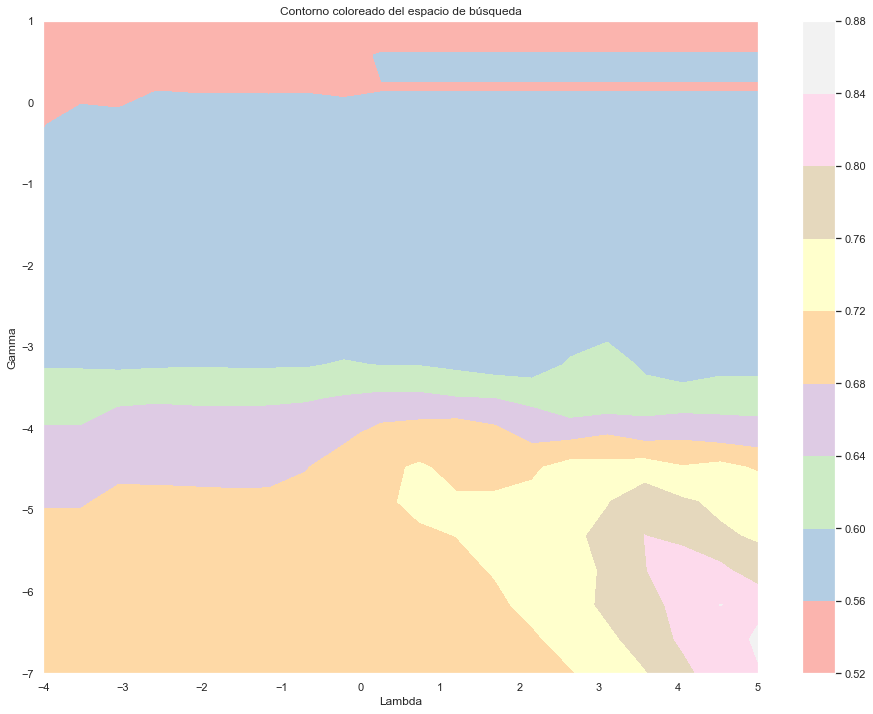

In [8]:
C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape), cmap=plt.cm.Pastel1)
plt.colorbar(cp)
plt.title('Contorno coloreado del espacio de búsqueda')
plt.xlabel('Lambda')
plt.ylabel('Gamma')
plt.show()

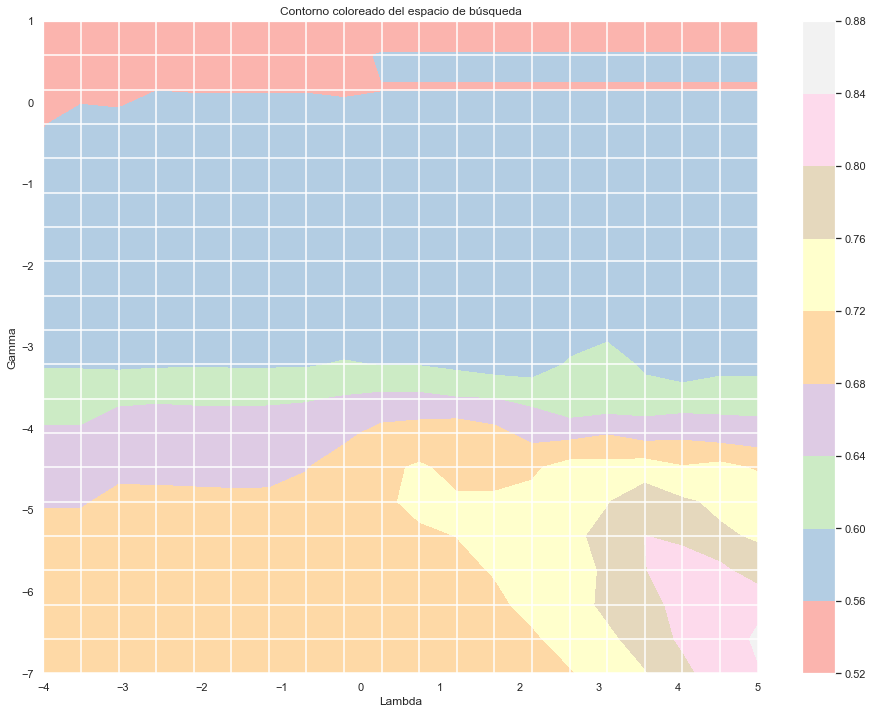

In [9]:
C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape), cmap=plt.cm.Pastel1)
plt.colorbar(cp)
plt.title('Contorno coloreado del espacio de búsqueda')
plt.xlabel('Lambda')
plt.ylabel('Gamma')
plt.vlines(lambdas, gammas.min(), gammas.max(), color="white")
plt.hlines(gammas, lambdas.min(), lambdas.max(), color="white")
plt.show()

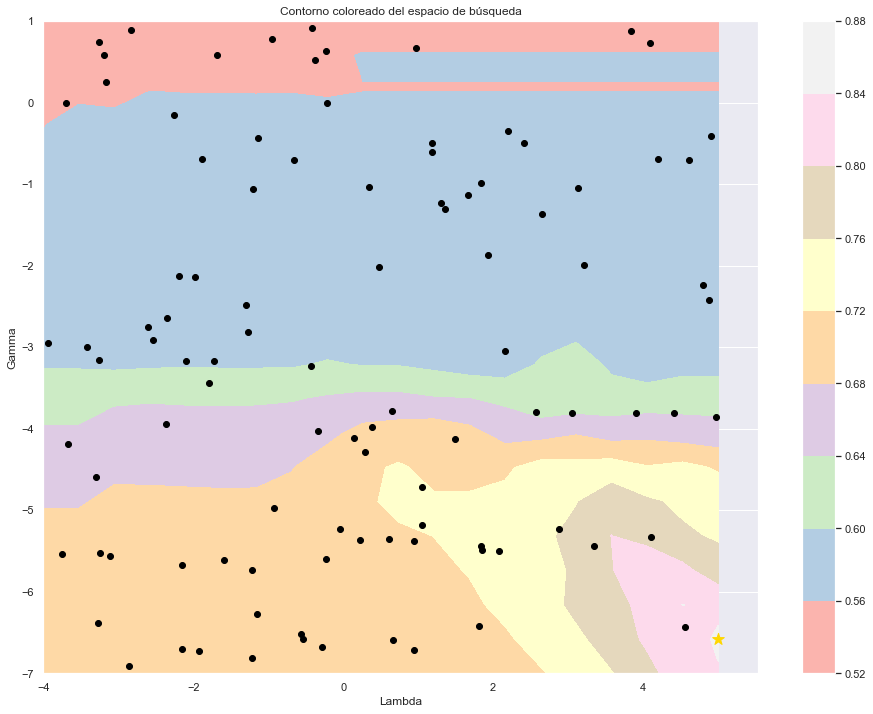

In [10]:
#búsqueda aleatoria

C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape), cmap=plt.cm.Pastel1)
plt.colorbar(cp)
plt.title('Contorno coloreado del espacio de búsqueda')
plt.xlabel('Lambda')
plt.ylabel('Gamma')
for p in range(100):
    px = np.random.uniform(lambdas.min(), lambdas.max())
    py = np.random.uniform(gammas.min(), gammas.max())
    plt.plot(px, py, marker='o', color='black')
plt.scatter(optima[0], optima[1], marker='*', c='gold', s=150)
plt.show()

### Métodos más inteligentes

#### Optimización Bayesiana

La optimización bayesiana es una implementación orientada a hyper-parámetros de un método llamado optimización secuencial basada en modelos. Estos algoritmos usan evaluaciones funcionales previas para determinar el próximo (óptimo) punto a evaluar. A grandes rasgos, el algoritmo hace lo siguiente:

1. tomando las evaluaciones previas, determina una distribución a posteriori de la función objetivo.
2. determina el nuevo punto a evaluar que, en función de la distribución alcanzada en el punto anterior, maximiza una determinada función de utilidad. 

Estos pasos continúan hasta que se satisface algún criterio de convergencia. 

Para determinar la distribución de la función objetivo, es necesario contar con un modelo de verosimilitud y una distribución a priori. El modelo bayesiano, presume una distribución normal con ruido tal que:


$$y(x)= f(x) + e$$
$$e \sim \mathcal{N}(0,\,\sigma^{2})$$

Puesto de otra manera 

$$ y(x) \sim \mathcal{N}(f(x),\, \sigma^{2})$$

Para la distribución a priori de la función de pérdida, se usa un proceso gaussiano. En términos simples y para este contexto, un proceso gaussiano es similar a una distribución normal, pero en lugar de darnos un valor de probabilidad, nos da una distribución normal con media y varianza que describe la conocimiento que tenemos hasta el momento respecto de un determinado punto en el espacio de búsqueda. 

##### Función de Adquisición

Para encontrar en siguiente punto a probar, necesitamos una función de utilidad que nos diga cuál es el punto más prometedor. Hay múltiples funciones de utilidad, pero en general se usa una llamada "mejora esperada" (expected improvemente). 

$$ EI(x) = \mathbb{E}[max(\{0, f(x) - f(x^{*})\}]$$


$$ 
\begin{array}{@{} r @{} c @{} l @{} }
&EI(x) &{}=\displaystyle
\begin{cases}
(\mu(x)-f(x^{*})) * \Phi(Z) + \sigma(x) * \phi(Z) &\text{if } \sigma(x) > 0,\\
0 &\text{if } \sigma(x) = 0.
\end{cases}
\end{array}
$$

donde:
$$x^{*}: \text{es el valor optimo actual}$$
$$\Phi(Z): \text{normal acumulada}$$
$$\phi(Z): \text{densidad normal}$$
$$Z = \frac{\mu(x) - f(x^{*})}{\sigma(x)}$$

Vemos entonces que EI va a tender a ser grande cuando:

1. la media de la distribución en ese punto sea grande
2. la dispersión (incertidumbre) en ese punto sea alta

El algoritmo de optimización queda entonces:

1. Con cada nueva evaluación funcional, actualizar la distribución a posteriori de f.
2. Encontrar el nuevo x* que maximiza el EI.
3. Calcular la perdida f en el punto x*
4. repetir hasta convergencia (EI = 0 para todo nuevo valor) o alcanzar número máximo de iteraciones


In [11]:
from gp import bayesian_optimisation

bounds = np.array([[-4, 5], [-7, 1]])

xp, yp = bayesian_optimisation(n_iters=30, 
                               sample_loss=sample_loss, 
                               bounds=bounds,
                               n_pre_samples=3,
                               random_search=100000)

**********
haciendo 414.4284432806623 4.063612716353532e-07
el resultado fue 0.734956699581376
**********
haciendo 65.00085784362871 0.1636238669747772
el resultado fue 0.5696960981689196
**********
haciendo 699.5849628668482 2.5057356358875972e-05
el resultado fue 0.7423545201802321
**********
haciendo 99861.90861419354 2.7537350495772143e-07
el resultado fue 0.8377911993097499
**********
haciendo 99869.62522796729 2.272386468557161e-05
el resultado fue 0.726855846355415
**********
haciendo 0.0001014881400213099 1.0425114996950949e-07
el resultado fue 0.7038475058319751
**********
haciendo 0.00010349423553449396 9.821495684281269
el resultado fue 0.5343127856070047
**********
haciendo 97482.52652600622 1.06221334175281e-07
el resultado fue 0.8378551113667593
**********
haciendo 99374.18128885639 1.088121291631294e-07
el resultado fue 0.8374396829961972
**********
haciendo 0.0001001908617478155 0.00019722356974316305
el resultado fue 0.6381938452689099
**********
haciendo 98201.1974043

C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\gaussian_process\gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.99769464e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


**********
haciendo 99543.50271245078 1.4307607207077053e-07
el resultado fue 0.8351228709296009
**********
haciendo 99794.65585803115 1.1366239621078769e-07
el resultado fue 0.8398044291055508
**********
haciendo 39702.78336369106 1.0218075505013497e-07
el resultado fue 0.8251525900361103
**********
haciendo 99309.07690675119 1.0247939940901713e-07
el resultado fue 0.8414022305307897
**********
haciendo 0.09268564908036163 1.0094121109723173e-07
el resultado fue 0.7010673313520596


C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\gaussian_process\gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.65218588e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


**********
haciendo 98537.93624488167 9.795392421942056
el resultado fue 0.5347841370274503
**********
haciendo 97775.9891039963 1.0494533556575926e-07
el resultado fue 0.836816540440354
**********
haciendo 99091.10532203788 3.1863430121272425e-07
el resultado fue 0.8387339021506407
**********
haciendo 97443.06408447781 2.0637617248409422e-07
el resultado fue 0.8371041446968971
**********
haciendo 98424.55241563205 1.0459486572821482e-07
el resultado fue 0.8370721886683924
**********
haciendo 99720.91482634908 5.003315100525402e-07
el resultado fue 0.8382066276803117
**********
haciendo 99981.50429494525 2.9888196786078895e-07
el resultado fue 0.8374237049819447
**********
haciendo 99924.34554740081 5.777788148395057e-07
el resultado fue 0.8380468475377881
**********
haciendo 46179.69157016006 5.316763098363876e-07
el resultado fue 0.8403317035758796
**********
haciendo 52890.109998825574 4.479004175821733e-07
el resultado fue 0.8409228901032181
**********
haciendo 40810.423200714424 6

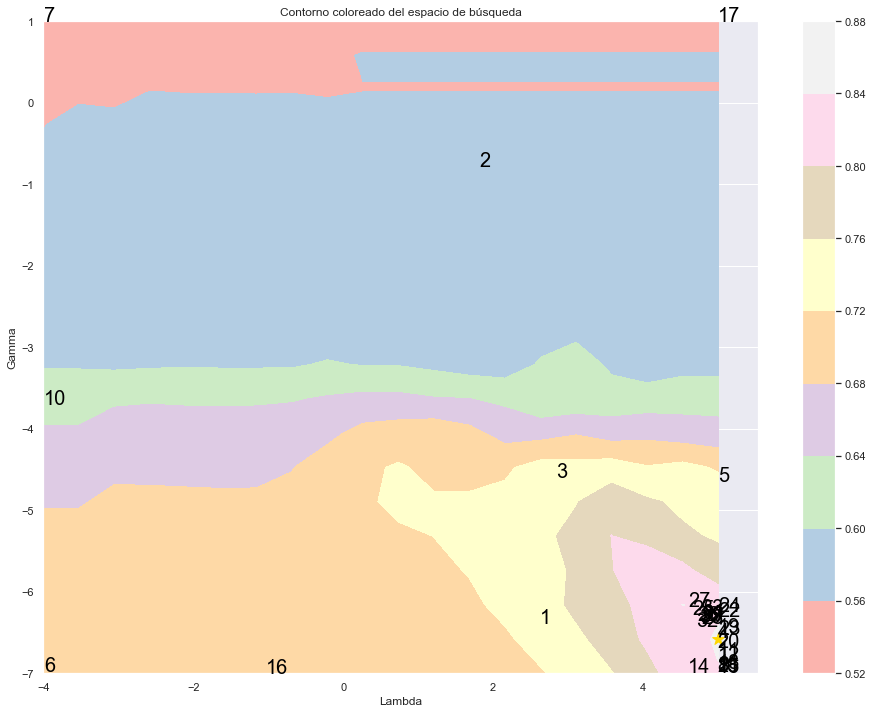

In [12]:
C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape), cmap=plt.cm.Pastel1)
plt.colorbar(cp)
plt.title('Contorno coloreado del espacio de búsqueda')
plt.xlabel('Lambda')
plt.ylabel('Gamma')
for i, ((px, py), score) in enumerate(zip(xp, yp)):
    plt.text(px, py, str(i + 1), color="black", fontsize=20)
plt.scatter(optima[0], optima[1], marker='*', c='gold', s=150)
plt.show()

In [13]:
### exploration vs exploitation

In [14]:
optima

array([ 5.        , -6.57894737])

In [15]:
def sample_loss(Ci, gammai):
    try:
        C = 10 ** Ci[0]
    except: 
        C = 10 ** Ci
    gamma = 10 ** gammai
    print("*"*10)
    print("haciendo", C, gamma)
    res = cross_val_score(SVC(C=C, gamma=gamma, random_state=12345),
                           X=X, y=y, scoring='roc_auc', cv=folds, n_jobs=-1).mean()
    print("el resultado fue", res)
    return res

In [16]:
import sklearn.gaussian_process as gp

from scipy.stats import norm
from scipy.optimize import minimize


In [17]:
def expected_improvement(x, gaussian_process, evaluated_loss, greater_is_better=False, n_params=1):
    """ expected_improvement
    Expected improvement acquisition function.
    Arguments:
    ----------
        x: array-like, shape = [n_samples, n_hyperparams]
            The point for which the expected improvement needs to be computed.
        gaussian_process: GaussianProcessRegressor object.
            Gaussian process trained on previously evaluated hyperparameters.
        evaluated_loss: Numpy array.
            Numpy array that contains the values off the loss function for the previously
            evaluated hyperparameters.
        greater_is_better: Boolean.
            Boolean flag that indicates whether the loss function is to be maximised or minimised.
        n_params: int.
            Dimension of the hyperparameter space.
    """

    x_to_predict = x.reshape(-1, n_params)

    mu, sigma = gaussian_process.predict(x_to_predict, return_std=True)

    if greater_is_better:
        loss_optimum = np.max(evaluated_loss)
    else:
        loss_optimum = np.min(evaluated_loss)

    scaling_factor = (-1) ** (not greater_is_better)

    # In case sigma equals zero
    with np.errstate(divide='ignore'):
        Z = scaling_factor * (mu - loss_optimum) / sigma
        expected_improvement = scaling_factor * (mu - loss_optimum) * norm.cdf(Z) + sigma * norm.pdf(Z)
        expected_improvement[sigma == 0.0] == 0.0

    return -1 * expected_improvement


In [18]:
def sample_next_hyperparameter(acquisition_func, gaussian_process, evaluated_loss, greater_is_better=False,
                               bounds=(0, 10), n_restarts=25):
    """ sample_next_hyperparameter
    Proposes the next hyperparameter to sample the loss function for.
    Arguments:
    ----------
        acquisition_func: function.
            Acquisition function to optimise.
        gaussian_process: GaussianProcessRegressor object.
            Gaussian process trained on previously evaluated hyperparameters.
        evaluated_loss: array-like, shape = [n_obs,]
            Numpy array that contains the values off the loss function for the previously
            evaluated hyperparameters.
        greater_is_better: Boolean.
            Boolean flag that indicates whether the loss function is to be maximised or minimised.
        bounds: Tuple.
            Bounds for the L-BFGS optimiser.
        n_restarts: integer.
            Number of times to run the minimiser with different starting points.
    """
    best_x = None
    best_acquisition_value = 1
    n_params = bounds.shape[0]

    for starting_point in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, n_params)):

        res = minimize(fun=acquisition_func,
                       x0=starting_point.reshape(1, -1),
                       bounds=bounds,
                       method='L-BFGS-B',
                       args=(gaussian_process, evaluated_loss, greater_is_better, n_params))

        if res.fun < best_acquisition_value:
            best_acquisition_value = res.fun
            best_x = res.x

    return best_x

In [19]:
def bo(n_iters, sample_loss, xp, yp, bounds):
    kernel = gp.kernels.Matern()
    model = gp.GaussianProcessRegressor(kernel=kernel,
                                        alpha=1e-4,
                                        n_restarts_optimizer=10,
                                        normalize_y=True)
    
    for i in range(n_iters):
        # actualizar modelo de la función de pérdida
        x = np.asarray(xp)
        x = x[:, None]
        model.fit(x, yp)

        yield xp, yp, model
        # encontrar el nuevo valor a evaluar
        next_sample = sample_next_hyperparameter(expected_improvement, model, yp, greater_is_better=True, 
                                                 bounds=bounds, n_restarts=100)

        # evaluar el nuevo valor
        next_loss = sample_loss(next_sample, -6.6)
        
        xp.append(next_sample[0])
        yp.append(next_loss)


In [20]:
bounds = np.asarray([[-4, 10]])

gamma = -6.6
xp = list(np.random.uniform(bounds[0, 0], bounds[0, 1], 3))
yp = [sample_loss(C, gamma) for C in xp]

lambdas  = np.linspace(bounds[0, 0], bounds[0, 1], 20)
real_loss = [sample_loss(params, gamma) for params in lambdas]

**********
haciendo 0.0002545122079898104 2.5118864315095823e-07
el resultado fue 0.6954270923209663
**********
haciendo 66.5112970458735 2.5118864315095823e-07
el resultado fue 0.7110056562170454
**********
haciendo 0.007005924148523551 2.5118864315095823e-07
el resultado fue 0.6954270923209663
**********
haciendo 0.0001 2.5118864315095823e-07
el resultado fue 0.6954270923209663
**********
haciendo 0.000545559478116852 2.5118864315095823e-07
el resultado fue 0.6954270923209663
**********
haciendo 0.002976351441631319 2.5118864315095823e-07
el resultado fue 0.6954270923209663
**********
haciendo 0.01623776739188721 2.5118864315095823e-07
el resultado fue 0.699277793755792
**********
haciendo 0.08858667904100823 2.5118864315095823e-07
el resultado fue 0.7016265618508931
**********
haciendo 0.4832930238571752 2.5118864315095823e-07
el resultado fue 0.7016904739079027
**********
haciendo 2.6366508987303554 2.5118864315095823e-07
el resultado fue 0.7022177483782315
**********
haciendo 14.3

In [21]:
def plot_proc(xp, yp, lambdas, real_loss, model):
    x_render = {k: v for k, v in zip(lambdas, real_loss)}
    x_render.update({k: v for k, v in zip(xp, yp)})
    y_render = [x_render[k] for k in sorted(x_render.keys())]
    x_render = list(sorted(x_render.keys()))
    fig, ax1 = plt.subplots()
    ax1.set_title('AUC por lambda')
    ax1.set_xlabel('Lambda')
    ax1.set_ylabel('AUC')
    ax1.plot(lambdas, real_loss, 'r:', label=u'real loss')
    ax1.plot(xp, yp, 'r.', markersize=10, label=u'Observations')
    exp_loss, sigma = [], []
    exp_improv = -1 * expected_improvement(lambdas, model, yp, greater_is_better=True, n_params=1)
    for x in x_render:
        proc_loss, std = model.predict(x, return_std=True)
        exp_loss.append(proc_loss[0])
        sigma.append(std[0])

    exp_loss = np.asarray(exp_loss)
    sigma = np.asarray(sigma)
    plt.fill_between(x_render, exp_loss - 1.9600 * sigma, exp_loss + 1.9600 * sigma,
                     alpha=.5, label='95% confidence interval')
    plt.plot(x_render, exp_loss, 'b-', label=u'Prediction')
    plt.legend(loc='upper left')
    ax2 = ax1.twinx()
    ax2.plot(lambdas, exp_improv, 'black', label=u'Expected Improvement')
    ax2.set_ylabel('Expected Improvement')
    plt.show()

ValueError: Expected 2D array, got scalar array instead:
array=-4.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

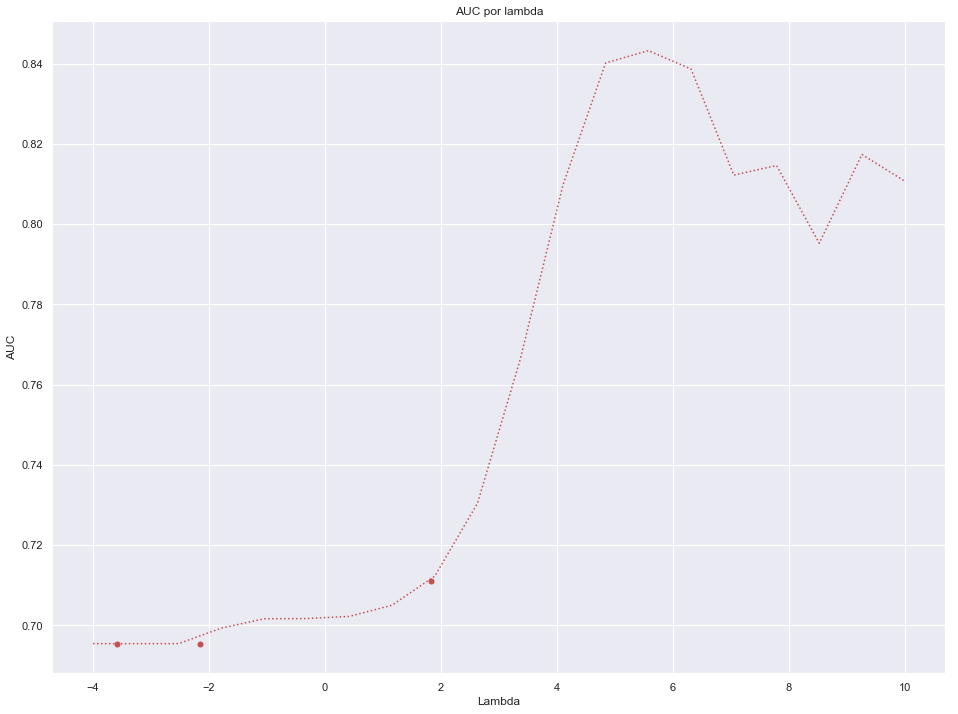

In [22]:
opti = bo(100, sample_loss, xp, yp, bounds)
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
xp, yp, model = next(opti)
plot_proc(xp, yp, lambdas, real_loss, model)

In [ ]:
sample_loss(1, -6.6)

In [ ]:
sample_loss(1, -6.6)

In [ ]:
sample_loss(1, -6.6)

In [ ]:
[sample_loss(l * 1.0001, -6.6) for l in lambdas[-4:]]

In [ ]:
real_loss[-4:]